In [1]:
# Create a connection

from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['127.0.0.1']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

In [2]:
# Create a keyspace
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS killrvideo
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

In [3]:
# Set the keyspace
try:
    session.set_keyspace('killrvideo')
except Exception as e:
    print(e)

In [52]:
# partition key = tag and video_id = clustering column
query = """
CREATE TABLE IF NOT EXISTS videos_by_title_year(
    title text,
    added_year int,
    added_date timestamp,
    description text,
    user_id uuid,
    video_id uuid,
    PRIMARY KEY ((title, added_year))
)
"""
try:
    session.execute(query)
except Exception as e:
    print(e)

# Load data into videos_by_title_year

In [53]:
import csv
import uuid
import datetime
import re

In [54]:
file =  r'C:\Users\abdul\cassandra-fundamentals\foundations-of-apache-cassandra\data\videos_by_title_year.csv'

with open(file, encoding="utf8") as f:
    reader = csv.reader(f)
    next(reader)
    for line in reader:
        query = "INSERT INTO videos_by_title_year(title, added_year, added_date, description, user_id, video_id)"
        query = query + "VALUES(%s, %s, %s, %s, %s, %s)"
        
        title = line[0]
        added_year = int(line[1])
        added_date = line[2]
        if "/" in added_date:
            added_date = datetime.datetime.strptime(added_date, "%m-%d-%Y").date()
        else:
            added_date = added_date
            
        #datetime.datetime.strptime(added_date, "%Y-%m-%d %H:%M:%S%z") #2015-03-29 08:00:03+0000
        
        description = line[3]
        user_id = uuid.UUID(line[4])
        video_id = uuid.UUID(line[5])
        
        session.execute(query, (title, added_year, added_date, description, user_id, video_id)) 

# Running queries

In [55]:
query = "SELECT COUNT(*) FROM videos_by_title_year"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)

for row in rows:
    print(f"The total number of rows in the videos_by_title_year: {row[0]}")

The total number of rows in the videos_by_title_year: 430


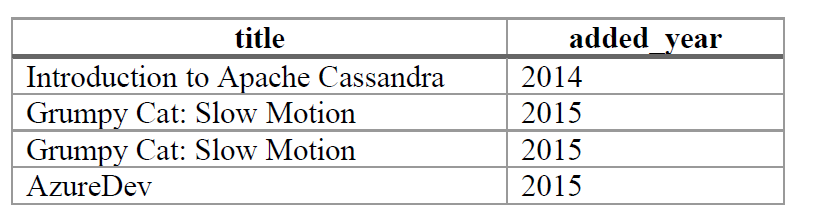

`Queries to extract`

Lets pull out data with title and added_year :
- `Introduction to Apache Cassandra` and `2014` respectively
- `Grumpy Cat: Slow Motion` and `2015` respectively
- `AzureDev` and `2015` respectively

## Query 1

In [56]:
query1 = """
    SELECT added_date, description, user_id, video_id
    FROM videos_by_title_year
    WHERE title='Introduction To Apache Cassandra' AND added_year=2014
    LIMIT 5

"""
try:
    rows = session.execute(query1)
except Exception as e:
    print(e)

for row in rows:
    print(row.added_date, row.user_id, row.video_id, row.description)

2014-11-06 01:01:00 fd3f7889-fc0c-43db-951c-7b77710898bc d6b62ec5-d3fa-130a-a3e9-8b95aa25a13e This talk is part of Cerner's Tech Talk series. Check us out at http://engineering.cerner.com/ and @CernerEng\n\nApache Cassandra is a popular choice for a wide variety of application persistence needs. There are many design choices that can effect uptime and performance. In this talk we'll look at some of the many things to consider from a single server to multiple data centers. Basic understanding of Cassandra features coupled with client driver features can be a very powerful combination. This talk will be an introduction but will deep dive into the technical details of how Cassandra works.\n\nAbout the Speaker:\nPatrick McFadin (@PatrickMcFadin) is the Chief Evangelist at DataStax, the leading distributor of Apache Cassandra. Cassandra is a widely used open source NoSQL database created at Facebook and used at companies like Netflix, eBay, and Twitter. McFadin has a lot of experience with 

## Query 2

In [57]:
query2 = """
    SELECT added_date, description, user_id, video_id
    FROM videos_by_title_year
    WHERE title='Grumpy Cat: Slow Motion' AND added_year=2015
    LIMIT 5

"""
try:
    rows = session.execute(query2)
except Exception as e:
    print(e)

for row in rows:
    print(row.added_date, row.user_id, row.video_id, row.description)

2015-02-01 16:00:00 a15379d4-6d88-41bf-a46d-b4cac7707fc7 e619d225-59a9-1ed8-b43f-dcf2905788c4 Grumpy Cat - The internet's grumpiest cat! Grumpy Cat Book: http://amzn.to/10Yd47R Grumpy Cat 2014 Calendar: http://amzn.to/YGK6MB New T-Shirts by ...


## Query 3

In [58]:
query3 = """
    SELECT added_date, description, user_id, video_id
    FROM videos_by_title_year
    WHERE title='AzureDev' AND added_year=2015
    LIMIT 5

"""
try:
    rows = session.execute(query3)
except Exception as e:
    print(e)

for row in rows:
    print(row.added_date, row.user_id, row.video_id, row.description)

2015-02-13 00:00:02 8cb63b7d-dc39-4881-8c62-f37f086d20da 2c366de4-6ccc-1142-ba73-174b975f3f69 


# DRop table

In [51]:
query = "DROP TABLE IF EXISTS videos_by_title_year"
try:
    session.execute(query)
except Exception as e:
    print(e)